In [156]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [172]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 100.0
#n_e = 100000.




#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
#n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 1.0000000000000000e+06 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_e_nt = 1.
#p_PL = 2.2
p_PL = 3.
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 10.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001


#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f



#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)


#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans

def K_s(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn

def PL_f_without_cutoff_without_norm(gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    prefactor_PL  = 1. / (m**3 * c**3 * gamma**2 * beta)
    non_thermal_body = n_e_nt *(p_PL - 1.)/(4.*np.pi*(gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
    non_thermal_tail = gamma**(- p_PL)
    PL_dist = prefactor_PL * non_thermal_body * non_thermal_tail
    return PL_dist

#def norm_PL_without_cutoff(gamma):
#    ans = PL_f_without_cutoff_without_norm(gamma)
#    return

def norm_PL_without_cutoff_value():
    ans = quad(PL_f_without_cutoff_without_norm, 1, np.inf, epsabs = 0, epsrel = 1e-8)[0]
    print ans
    return ans

norm_PL_without_cutoff_inv = 1./norm_PL_without_cutoff_value()
print norm_PL_without_cutoff_inv


def PL_f_with_cutoff_without_norm(gamma):
    f = norm_PL_without_cutoff_inv * PL_f_without_cutoff_without_norm(gamma) * np.exp(- gamma/gamma_50_max)
    return f



#def PL_f_with_cutoff_without_norm(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    prefactor_PL  = 1. / (m**3 * c**3 * gamma**2 * beta)
#    non_thermal_body = n_e_nt *(p_PL - 1.)/(4.*np.pi*(gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
#    non_thermal_tail = gamma**(- p_PL) * np.exp(- gamma/gamma_50_max)
#    PL_dist = prefactor_PL * non_thermal_body * non_thermal_tail
#    return PL_dist

#def norm_term_PL(gamma):
#    ans = PL_f_with_cutoff_without_norm(gamma)
#    return ans

def norm_PL():
    ans = quad(PL_f_with_cutoff_without_norm, 1, np.inf, epsabs = 0, epsrel = 1e-8)[0]
    print ans
    return ans

norm_term = 1./norm_PL()
print norm_term

#def PL_f_with_cutoff(gamma):
#    f = norm_term * PL_f_with_cutoff_without_norm(gamma)
#    return f

def PL_f_with_cutoff(gamma):
    f = 4. * np.pi * norm_term * PL_f_without_cutoff_without_norm(gamma) * np.exp(- gamma/gamma_50_max)
    return f



def I_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
    ans = prefactor_Jnu * PL_f_with_cutoff(gamma) * d_3_p * K_s(n, gamma)
    
    return ans

def jnu_integrand_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_62 = 1. / (nu * beta * np.absolute(np.cos(theta)))
    
    f = prefactor_62 * I_in_eq62(gamma, n)
    
    return f

def jnu_n_integral_62_one(n):
    
#    def jnu_integrand_in_eq62_gamma(gamma):
#        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
#        return jnu_integrand_62
    
    def jnu_integrand_in_eq62_gamma_with_cutoff(gamma):
        jnu_integrand_62_cutoff = jnu_integrand_in_eq62(gamma, n)
        return jnu_integrand_62_cutoff
    
        
    ans_once = quad(jnu_integrand_in_eq62_gamma_with_cutoff, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
    return ans_once

#def jnu_nonthermal_power_law():
#    ans = 0
#    for i in range(int(n_dn + 1.), int(n_dn + 100000.)):
#        ans = ans + jnu_n_integral_62_one(i)
#    return ans

n_peak = 250000000

def jnu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(jnu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + jnu_n_integral_62_one(i)
#        print ans
        
    total = ans + jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total




5.20955189684e+48
1.91955089382e-49
0.998822652363
1.00117873542


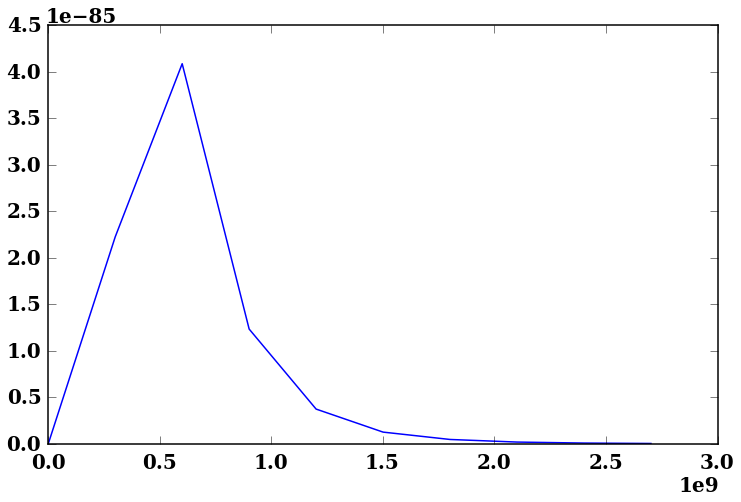

In [160]:
x_value = []
y_value = []
n_max_here = 3000000000

step = int((int(n_max_here))/10.)


for i in xrange(int(n_dn + 1.), int(n_dn + 1. + n_max_here), step):
    x_value = x_value + [i]
    y_value = y_value + [jnu_n_integral_62_one(i)]

#    print int(n_dn + 1.), x_value
pl.plot(x_value, y_value)
#print x_value, int(n_dn+1) 
#pl.xlim([0,4000])

In [173]:
n_max = 1000
print jnu_62_sum_to_n_max_integral_to_n_limit(n_max)

1.67315643297e-26


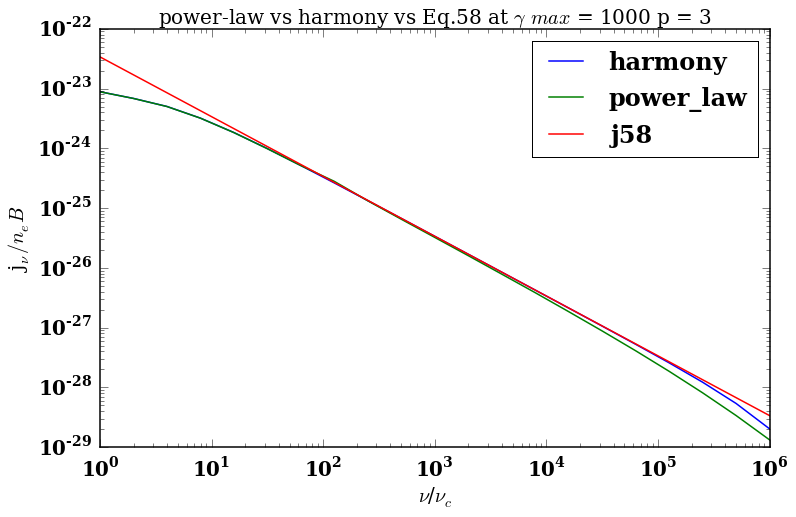

In [175]:
data_iharmony = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/iharmony/nonthermal_output_1000_3.txt')
data_power_law = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/power_law_Prof_cutoff.txt')

pl.loglog(data_iharmony[:,0], data_iharmony[:,1]/(n_e_nt * B), label = 'harmony')
pl.loglog(data_power_law[:,0], data_power_law[:,1]/(n_e_nt * B), label = 'power_law')
pl.loglog(data_iharmony[:,0], data_iharmony[:,2]/(n_e_nt * B), label = 'j58')
#pl.loglog(x/nu_c, jnu_58(x), label = 'Eq.58')

pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("j$_\\nu / n_eB$")
pl.title("power-law vs harmony vs Eq.58 at $\\gamma$ $max$ = 1000 p = 3")
pl.legend(loc = 'upper right')
pl.show()






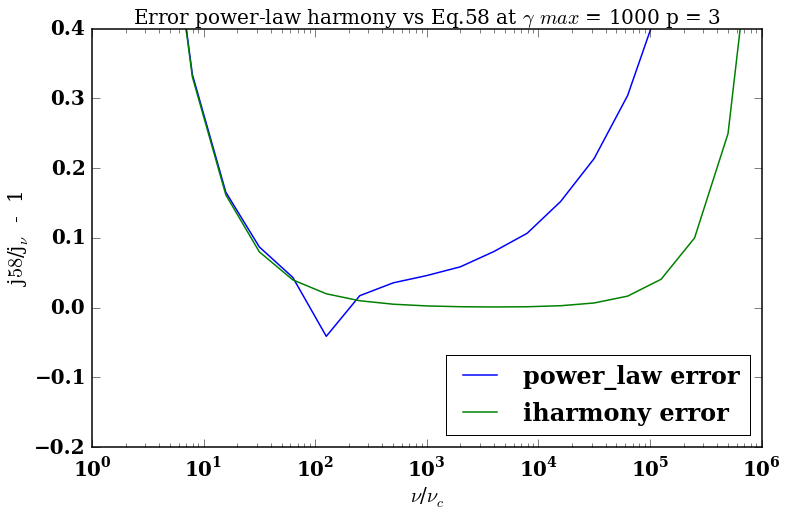

In [125]:
#error_power_law_vs_j58 = (data_power_law[:,1] / data_iharmony[:,2]) - 1.
#error_harmony_vs_j58   = (data_iharmony[:,1] / data_iharmony[:, 2]) - 1.

error_power_law_vs_j58 = ( data_iharmony[:,2] / data_power_law[:,1]) - 1.
error_harmony_vs_j58   = ( data_iharmony[:,2] / data_iharmony[:,1]) - 1.

pl.semilogx(data_power_law[:,0], error_power_law_vs_j58, label = 'power_law error')
pl.semilogx(data_iharmony[:,0], error_harmony_vs_j58, label = 'iharmony error')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("j$58$/j$_\\nu$  -  1")
pl.ylim([-0.2, 0.4])
pl.legend(loc = 'lower right')
pl.title("Error power-law harmony vs Eq.58 at $\\gamma$ $max$ = 1000 p = 3")
pl.show()

